# Example: Exploring the overlay module of `stco`

With `stco` we can run simple and weighted overlays, as well as the STCEC method on cluster footprints across time.

In this notebook, the aforementioned methods will be explored through a simple set of overlapping polygons to demonstrate how the methods work.

In [1]:
# Imports
import geopandas as gpd
import shapely

In [2]:
# Import STCO Locally
import os
import sys

sys.path.append(os.path.abspath(".."))

from stco.overlay import simple_overlay, stcec, weighted_overlay

## Creating Polygons
Rather than running TemporalADBSCAN from the clustering module of `stco`, we will create some polygons to demonstrate how the overlay methods work on a very simple set of three polygonsm with each polygon representing a cluster footrpint from a different time step.

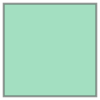

In [3]:
# Creating Polygon 1
polygon_1 = shapely.Polygon(
    ((0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0))
)

polygon_1

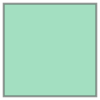

In [4]:
# Creating Polygon 2
polygon_2 = shapely.Polygon(
    ((0.5, 0.0), (0.5, 1.0), (1.5, 1.0), (1.5, 0.0), (0.5, 0.0))
)

polygon_2

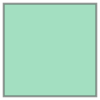

In [5]:
# Creating Polygon 3
polygon_3 = shapely.Polygon(
    ((0.5, 0.5), (0.5, 1.5), (1.5, 1.5), (1.5, 0.5), (0.5, 0.5))
)

polygon_3

In [6]:
# Aggregating Polygons to GDF
data = {
    "PERIOD": ["2021", "2022", "2023"],
    "geometry": [polygon_1, polygon_2, polygon_3],
}
gdf = gpd.GeoDataFrame(data)

gdf

,PERIOD,geometry
0,2021,"POLYGON ((0.00000 0.00000, 0.00000 1.00000, 1...."
1,2022,"POLYGON ((0.50000 0.00000, 0.50000 1.00000, 1...."
2,2023,"POLYGON ((0.50000 0.50000, 0.50000 1.50000, 1...."


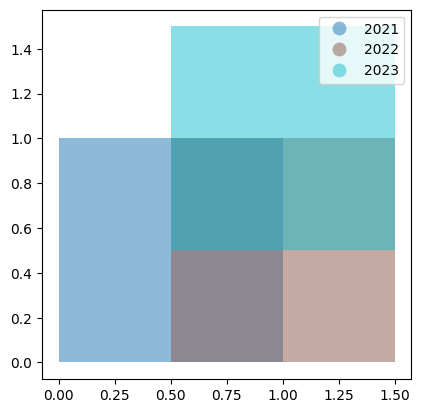

In [7]:
# Plot
gdf.plot(column="PERIOD", alpha=0.5, legend=True);

## Weighted Overlay
Now that we have polygonal data (with a geometry column and a column called "PERIOD" that represents the time step), we can start running the overlay methods.

With the weighted overlay method, clusters from more recent time periods are given a higher weight than less recent time periods. The weights are simply the time index (from `1` to `n`, where `n` is the most recent time step and `1` is the initial time step) normalized by the sum of all time indexes. Mathematically, this can be defined as:

$$ Weight_i = {i \over \sum_{i=1}^n i} $$

Therefore, the resulting values can range from 0 to 1, where 1 would indicate that a given area was included in every time step.

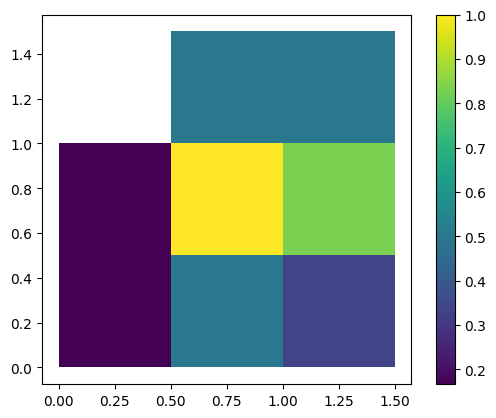

In [8]:
# Weighted Overlay
wo = weighted_overlay(gdf)

wo.plot(column="WEIGHT", legend=True);

## Simple Overlay
The simple overlay is exactly the same as the weighted overlay, except for rather than computing a weight, we can simply use the count of the number of overlapping cluster footprints as the indicator for determining the temporal stability of the clusters.

The means that the output values will range from `1` (only included in a cluster for one time step) to `n` (where `n` is the total number of time steps).

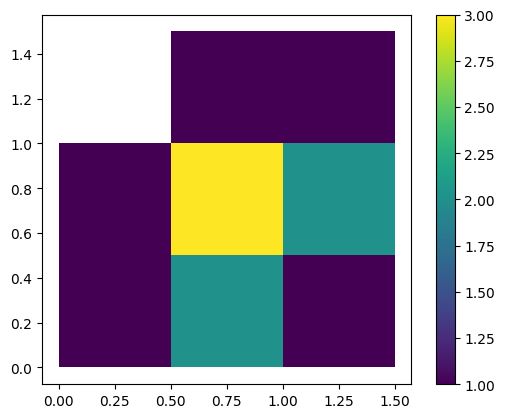

In [9]:
# Simple Overlay
so = simple_overlay(gdf)

so.plot(column="COUNT", legend=True);

## STCEC
STCEC or the Spatiotemporal Cluster Evolution Classifier is a framework that was designed to categorize different areas of overlapping clusters based on how the temporal patterns of the spatial overlap. For example, if an area overlaps five out of ten time steps, but they were the five most recent time steps, that tells a very different story than if it were the first five time steps, or if it was a cluster on and off over the ten time steps. By looking at these boolean temporal patterns of when each area was either classified as a cluster or not, we can start to uncover some of the stories and patterns that might not otherwise be obvious.

See notebook `02-accident-example.ipynb` for more information.

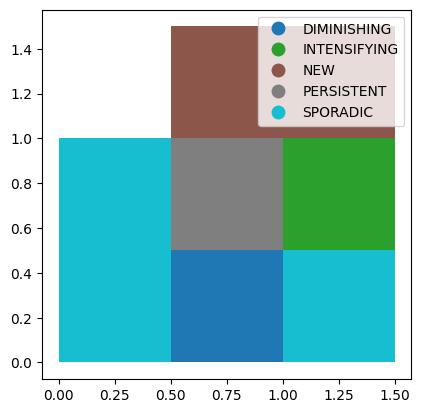

In [10]:
# STCEC
stcec_classes = stcec(gdf)

stcec_classes.plot(column="STCEC", legend=True);